# Build Your First Machine Learning Model With Cloud Computing

**Master-Series Part 1</br>**
First City University College </br>
Author : **Hernando Ivan Teddy</br>**
Intro
-----------------------------------------

This notebook walks you through the process of building your first sentiment analysis model using machine learning, with an emphasis on improving accuracy through advanced preprocessing techniques and the use of a Support Vector Machine (SVM) classifier. You'll learn how to clean and balance the data for optimal performance, ensuring your model performs well across different scenarios. By the end of this notebook, you'll have a solid understanding of how to preprocess text data, handle class imbalance, and implement a powerful machine learning algorithm to predict sentiment in text. This hands-on approach will set the foundation for more complex AI models in the future.

# **Step By Step**

This command installs three essential Python libraries that are commonly used for data analysis, machine learning, and creating interactive widgets:

In [36]:
!pip install pandas scikit-learn ipywidgets

Import all necessary **function**

In [37]:
import pandas as pd
import random
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display

Preparing Data Sample and Data **Frame**

In [38]:
import random
import pandas as pd

# Enhanced sample sentence pools
positive_samples = [
    "I love this product!", "Absolutely fantastic experience.", "Highly recommend to everyone.",
    "Great quality and fast delivery.", "I'm very satisfied with the service.", "This is amazing!",
    "Totally worth the price.", "Best thing I bought this year.", "Exceeded my expectations.",
    "I'll definitely buy again.", "Incredible value for the price.", "Completely worth it!",
    "A game changer!", "I’m in love with it!", "I would buy it again in a heartbeat.",
    "This has exceeded all my expectations!"
]

negative_samples = [
    "I hate this product.", "Terrible experience.", "Would not recommend to anyone.",
    "Poor quality and slow delivery.", "I'm very disappointed.", "This is awful!", "Not worth the price.",
    "Worst thing I bought this year.", "Did not meet expectations.", "I'll never buy again.",
    "It broke within a week.", "Waste of money.", "Completely unsatisfied.", "Horrible customer service.",
    "Very disappointing purchase.", "I regret this purchase."
]

neutral_samples = [
    "It's okay, not the best.", "I’m not sure how I feel about it.", "It was fine, just average.",
    "Mixed feelings on this one.", "Neither good nor bad.", "The service was not helpful.",
    "It's not amazing, but not terrible.", "I'm not impressed.", "No major issues, but nothing great.",
    "Could have been better.", "It's a bit underwhelming.", "Not great, not bad.", "Just as expected, nothing more.",
    "I don’t feel strongly about this.", "It was an average experience.", "Just a regular product.",
    "I have no strong opinion on this.", "It was an alright experience.", "Nothing special about it.",
    "Could be better, could be worse.", "A little disappointing, but tolerable."
]

# Create a balanced dataset with more samples
positive_data = [sentence for sentence in positive_samples * 25]  # 250 positive samples
negative_data = [sentence for sentence in negative_samples * 25]  # 250 negative samples
neutral_data = [sentence for sentence in neutral_samples * 50]  # 250 neutral samples

# Shuffle the data to mix up sentiment categories
all_data = positive_data + negative_data + neutral_data
random.shuffle(all_data)

# Create DataFrame with labels
data = []
for sentence in all_data:
    if sentence in positive_data:
        data.append([sentence, 1])  # Label '1' for positive
    elif sentence in negative_data:
        data.append([sentence, 0])  # Label '0' for negative
    else:
        data.append([sentence, 2])  # Label '2' for neutral

df = pd.DataFrame(data, columns=["text", "label"])
df.head()


text  label
0  Could be better, could be worse.      2
1       Mixed feelings on this one.      2
2          Totally worth the price.      1
3   Worst thing I bought this year.      0
4          Totally worth the price.      1

Start Data Preprocessing

In [39]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\bnot\b", "not_", text)
    text = re.sub(r"\bno\b", "no_", text)
    return text

df['text'] = df['text'].apply(preprocess)

Vectorization

In [40]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
X = vectorizer.fit_transform(df['text'])
y = df['label']



Training And Split

In [41]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train using Linear SVM
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

Vizualize The Matrix

Model Accuracy: 100.00%


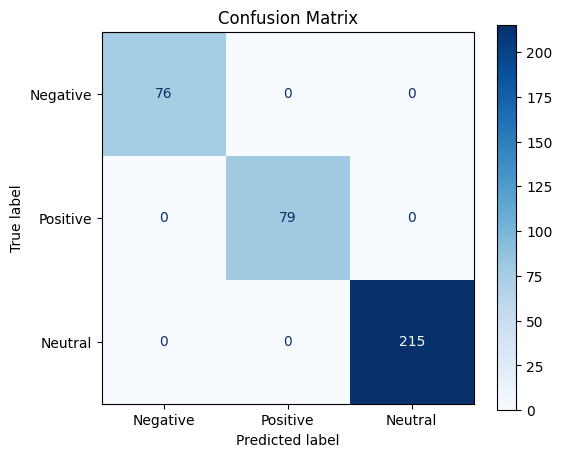

<ipython-input-43-63d319c72e83>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Model Accuracy"], y=[accuracy * 100], palette="viridis")


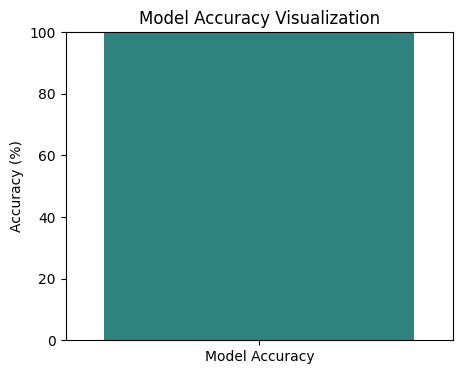

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Negative", "Positive", "Neutral"] if len(set(y_test)) == 3 else ["Negative", "Positive"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.show()

# Optional: Accuracy bar chart
plt.figure(figsize=(5, 4))
sns.barplot(x=["Model Accuracy"], y=[accuracy * 100], palette="viridis")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Visualization")
plt.show()


Put interactive prediction

In [44]:
# Interactive prediction
text_input = widgets.Text(
    value='',
    placeholder='Type a sentence here...',
    description='Input:',
    layout=widgets.Layout(width='100%')
)
output = widgets.Output()
label_map = {0: "Negative 😞", 1: "Positive 😊", 2: "Neutral 😐"}

def on_button_click(b):
    with output:
        output.clear_output()
        text = preprocess(text_input.value)
        text_vec = vectorizer.transform([text])
        prediction = model.predict(text_vec)[0]
        sentiment = label_map.get(prediction, "Unknown")
        print(f"Sentiment: {sentiment}")
button = widgets.Button(description='Analyze Sentiment', button_style='success', icon='search')
button.on_click(on_button_click)
display(text_input, button, output)

Text(value='', description='Input:', layout=Layout(width='100%'), placeholder='Type a sentence here...')

Button(button_style='success', description='Analyze Sentiment', icon='search', style=ButtonStyle())

Output()

In [45]:
test_sentences = [
    "I absolutely love this product! 😍",
    "This is the worst product I’ve ever bought.",
    "It's fine, not amazing, not terrible.",
    "Best investment ever!",
    "I regret this purchase. Bad quality.",
    "Delivery was fast, but the product is okay.",
    "The worst customer service experience ever.",
    "It’s not bad, but I expected more for the price.",
]



In [46]:
label_map = {0: "Negative 😞", 1: "Positive 😊", 2: "Neutral 😐"}

print("Custom Sentiment Predictions:\n" + "-"*40)
for sentence in test_sentences:
    processed = preprocess(sentence)
    vec = vectorizer.transform([processed])
    pred = model.predict(vec)[0]
    sentiment = label_map.get(pred, "Unknown")
    print(f"Sentence: {sentence}\n→ Predicted Sentiment: {sentiment}\n")


Custom Sentiment Predictions:
----------------------------------------
Sentence: I absolutely love this product! 😍
→ Predicted Sentiment: Positive 😊

Sentence: This is the worst product I’ve ever bought.
→ Predicted Sentiment: Negative 😞

Sentence: It's fine, not amazing, not terrible.
→ Predicted Sentiment: Neutral 😐

Sentence: Best investment ever!
→ Predicted Sentiment: Positive 😊

Sentence: I regret this purchase. Bad quality.
→ Predicted Sentiment: Negative 😞

Sentence: Delivery was fast, but the product is okay.
→ Predicted Sentiment: Positive 😊

Sentence: The worst customer service experience ever.
→ Predicted Sentiment: Negative 😞

Sentence: It’s not bad, but I expected more for the price.
→ Predicted Sentiment: Neutral 😐



Save the model

In [47]:
import joblib

# Save the trained model and the vectorizer to files
joblib.dump(model, 'sentiment_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print("Model and Vectorizer saved successfully!")


Model and Vectorizer saved successfully!


Load the model and use it

In [48]:
# Load the trained model and vectorizer from the saved files
loaded_model = joblib.load('sentiment_model.joblib')
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Example of using the loaded model and vectorizer for prediction
def predict_sentiment(input_text):
    processed_text = preprocess(input_text)
    text_vec = loaded_vectorizer.transform([processed_text])
    prediction = loaded_model.predict(text_vec)[0]

    label_map = {0: "Negative 😞", 1: "Positive 😊", 2: "Neutral 😐"}
    sentiment = label_map.get(prediction, "Unknown")
    return sentiment

# Example prediction
example_sentence = "I absolutely love this product!"
predicted_sentiment = predict_sentiment(example_sentence)
print(f"Sentiment: {predicted_sentiment}")


Sentiment: Positive 😊
